# Fundamentals of Data Science
# Student : 202105197
# Name : Dontoh Jude

In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
import numpy as np

### Reading the census data

In [2]:
df_original = pd.read_csv("census20.csv")
df = df_original.copy()   #this copies the original data

df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2085
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2132
dtype: int64

In [3]:
#Overview of the data
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Turkey Gardens,Alexander,Macdonald,21.0,Head,Married,Male,Sports development officer,None,None
1,1,Turkey Gardens,Yvonne,Macdonald,19.0,Wife,Married,Female,University Student,None,None
2,2,Turkey Gardens,Louise,Taylor,38.0,Head,Divorced,Female,Mining engineer,None,Christian
3,2,Turkey Gardens,Philip,Harding,55.0,Visitor,Single,Male,Quarry manager,None,Christian
4,3,Turkey Gardens,Rachael,Evans,78.0,Head,Widowed,Female,Retired Freight forwarder,None,Christian


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House Number                   8577 non-null   int64  
 1   Street                         8577 non-null   object 
 2   First Name                     8577 non-null   object 
 3   Surname                        8577 non-null   object 
 4   Age                            8577 non-null   float64
 5   Relationship to Head of House  8577 non-null   object 
 6   Marital Status                 6492 non-null   object 
 7   Gender                         8577 non-null   object 
 8   Occupation                     8577 non-null   object 
 9   Infirmity                      8577 non-null   object 
 10  Religion                       6445 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 737.2+ KB


In [5]:
df.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

# Cleaning the data

### Checking for empty cells
### Making assumptions to replace them when necessary

## House Number

In [6]:
df['House Number'].isnull().sum()

0

In [7]:
df['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
df['House Number'].value_counts()

1      322
4      269
6      244
3      243
7      237
      ... 
202      3
220      3
200      2
215      1
203      1
Name: House Number, Length: 220, dtype: int64

In [9]:
# This captures the empty cells with space buttom
df[df['House Number']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## Street

In [10]:
df['Street'].value_counts()

Faith Street            708
Lancelot Summit         643
Column Avenue           477
Harvey Dale             275
Whitehall Road          240
                       ... 
Baker Warehouse           4
Edwards Delve             3
Jenkins Warehouse         2
Peterborough Bastion      2
Humphreys Farmhouse       1
Name: Street, Length: 104, dtype: int64

In [11]:
df['Street'].isnull().sum()

0

In [12]:
df[df['Street'].str.isspace()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [13]:
(df['Street'] == ' ').sum()

0

In [14]:
df['Street'].unique()

array(['Turkey Gardens', 'Howarth Drive', 'Knight Greens', 'Ahmed Haven',
       'Summer Crescent', 'Dunn Spur', 'Barlow Pike', 'Charlton Avenue',
       'Steele Falls', 'Marsh Road', 'Aberdeen Knolls', 'Column Avenue',
       'Singh Forge', 'Polaris Crescent', 'Chemist Port', 'Webster Drive',
       'Wilson Forge', 'Haymarketbond Road', 'Chapman Trace',
       'Rosetap Road', 'Knight Corner', 'Silverpush Crescent',
       'Wilson Views', 'Faith Street', 'Clearwater Road', 'Allen Drive',
       'Parrot Crescent', 'Unitedpack Lane', 'Obelisk Orchard',
       'George Drive', 'Harvey Dale', 'Francis Field', 'Hughes Road',
       'Wales Crescent', 'Corporation Road', 'Edwards Points',
       'Stoke Harbors', 'Dundee Pass', 'Stationloom Street',
       'Coconut Keys', 'James Rapid', 'Goldfinch Avenue',
       'Aethelstan Pass', 'Penny Square', 'May Road', 'Ryan Greens',
       'Smith Divide', 'Wright Road', 'Unity Avenue',
       'Westminstertun Crescent', 'Cannon Groves', 'Snapdragon Drive

## First Name

In [15]:
df['First Name'].value_counts()

Anna         41
Geraldine    38
Leanne       36
Frank        36
Conor        36
             ..
Paige        12
Stuart       12
Ellie        12
Bradley      12
Maria        10
Name: First Name, Length: 364, dtype: int64

In [16]:
df['First Name'].isnull().sum()


0

In [17]:
df['First Name'].unique()

array(['Alexander', 'Yvonne', 'Louise', 'Philip', 'Rachael', 'Hugh',
       'Graham', 'Alexandra', 'Holly', 'Martyn', 'Katie', 'Maureen',
       'Lucy', 'Sean', 'Christian', 'Georgina', 'Ben', 'Jill', 'Julia',
       'Gerard', 'Hilary', 'Bryan', 'Bethan', 'Rebecca', 'Jordan',
       'Naomi', 'Louis', 'Zoe', 'Joanna', 'Damien', 'Dominic', 'Cameron',
       'Henry', 'Kerry', 'James', 'Joe', 'Katy', 'Anna', 'Vanessa',
       'Pamela', 'Martin', 'Victor', 'Terry', 'Danny', 'Neil', 'Barry',
       'Kathryn', 'Julian', 'Lesley', 'Kate', 'Dean', 'Graeme',
       'Mitchell', 'Denise', 'Geoffrey', 'Mark', 'Emily', 'Thomas',
       'Steven', 'Harriet', 'Derek', 'Kelly', 'Robin', 'Maria', 'Craig',
       'Adam', 'Suzanne', 'Judith', 'Charlie', 'Josephine', 'Justin',
       'Kimberley', 'Georgia', 'Nathan', 'Jacqueline', 'Callum',
       'Patrick', 'Sian', 'Jodie', 'Jayne', 'Amelia', 'Lee', 'Jean',
       'Sylvia', 'Vincent', 'Stanley', 'Frank', 'Richard', 'Carol',
       'Geraldine', 'Douglas', '

In [18]:
(df['First Name'] == ' ').sum()

0

## Surname

In [19]:
df['Surname'].value_counts()

Smith            223
Jones            187
Williams         142
Davies           122
Taylor           114
                ... 
Harrison-Hall      1
Riley-Taylor       1
Webb-Hall          1
Ward-Newton        1
Johnson-Rice       1
Name: Surname, Length: 673, dtype: int64

In [20]:
df['Surname'].isnull().sum()

0

#### Attention: this is space not nan

In [21]:
df[df['Surname'].str.isspace()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5517,13,Whitehall Road,Ricky,,50.0,Husband,Married,Male,Magazine journalist,None,None


#### Assigning missing column by grouping similar house number and street name, thus with the assumption that they live in the same apartment

In [22]:
# Obtaining info on missing values with house number and street name
df[(df['House Number'] == 13) & (df['Street'] == 'Whitehall Road')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5516,13,Whitehall Road,Nicole,Nash,51.0,Head,Married,Female,"Designer, ceramics/pottery",None,None
5517,13,Whitehall Road,Ricky,,50.0,Husband,Married,Male,Magazine journalist,None,None


In [23]:
# Imputing the same surname since the relationship to head of house is husband
df.loc[(df['House Number'] == 13) & (df['Street'] == 'Whitehall Road') & (df['Surname'] == ' '), 'Surname'] = 'Nash'

In [24]:
df[(df['Street'] == 'Whitehall Road') & (df['House Number'] == 13)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5516,13,Whitehall Road,Nicole,Nash,51.0,Head,Married,Female,"Designer, ceramics/pottery",None,None
5517,13,Whitehall Road,Ricky,Nash,50.0,Husband,Married,Male,Magazine journalist,None,None


In [25]:
(df['Surname'] == ' ').sum()

0

## Age

In [26]:
df['Age'].value_counts().transpose()

32.000000     168
37.000000     166
40.000000     164
41.000000     161
39.000000     151
             ... 
101.000000      1
22.000000       1
23.000000       1
82.074371       1
85.566373       1
Name: Age, Length: 116, dtype: int64

#### Changing Age from float to integer

In [27]:
# These are float, hence needs to be changed for effective analysis
df['Age'].unique()

array([ 21.        ,  19.        ,  38.        ,  55.        ,
        78.        ,  39.        ,  36.        ,  34.        ,
        32.        ,   9.        ,  50.        ,  54.        ,
        18.        ,  17.        ,  44.        ,  42.        ,
        23.        ,  20.        ,   3.        ,  58.        ,
        56.        ,  94.        ,  33.        ,  40.        ,
        25.        ,  22.        ,  24.        ,  67.        ,
        63.        ,   2.        ,   1.        ,  26.        ,
        52.        ,  71.        ,  43.        ,  27.        ,
        31.        ,  11.        ,   8.        ,   4.        ,
         7.        ,  51.        ,  14.        ,  57.        ,
        29.        ,  47.        ,  64.        ,  15.        ,
        79.        ,  60.        ,  59.        ,  12.        ,
        41.        ,  48.        ,  68.        ,  37.        ,
        53.        ,  10.        ,  28.        ,  35.        ,
        13.        ,  77.        ,  46.        ,   5.  

In [28]:
# Changing datatype to integer
df["Age"] = df["Age"].apply(np.int64)

In [29]:
print(sorted(df['Age'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107]


In [30]:
# statiscal info of numerical data
df["Age"].describe().transpose() 

count    8577.000000
mean       35.593098
std        21.376178
min         0.000000
25%        18.000000
50%        35.000000
75%        50.000000
max       107.000000
Name: Age, dtype: float64

<Figure size 1820x1820 with 0 Axes>

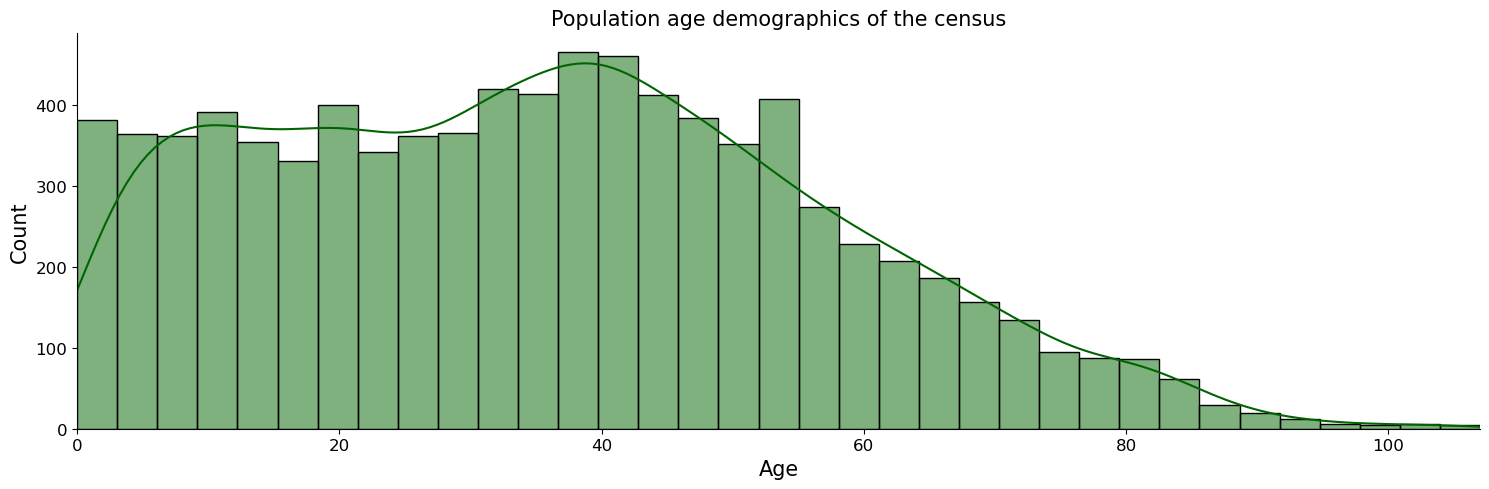

In [31]:
#Age distribution graph

plt.figure(figsize=(7,7), dpi=260)
sns.displot(df['Age'], kind='hist', kde=True, height=5, aspect=3, color="darkgreen")
plt.xlim(df['Age'].min(), df['Age'].max())
plt.title("Population age demographics of the census", fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Count", fontsize=15)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

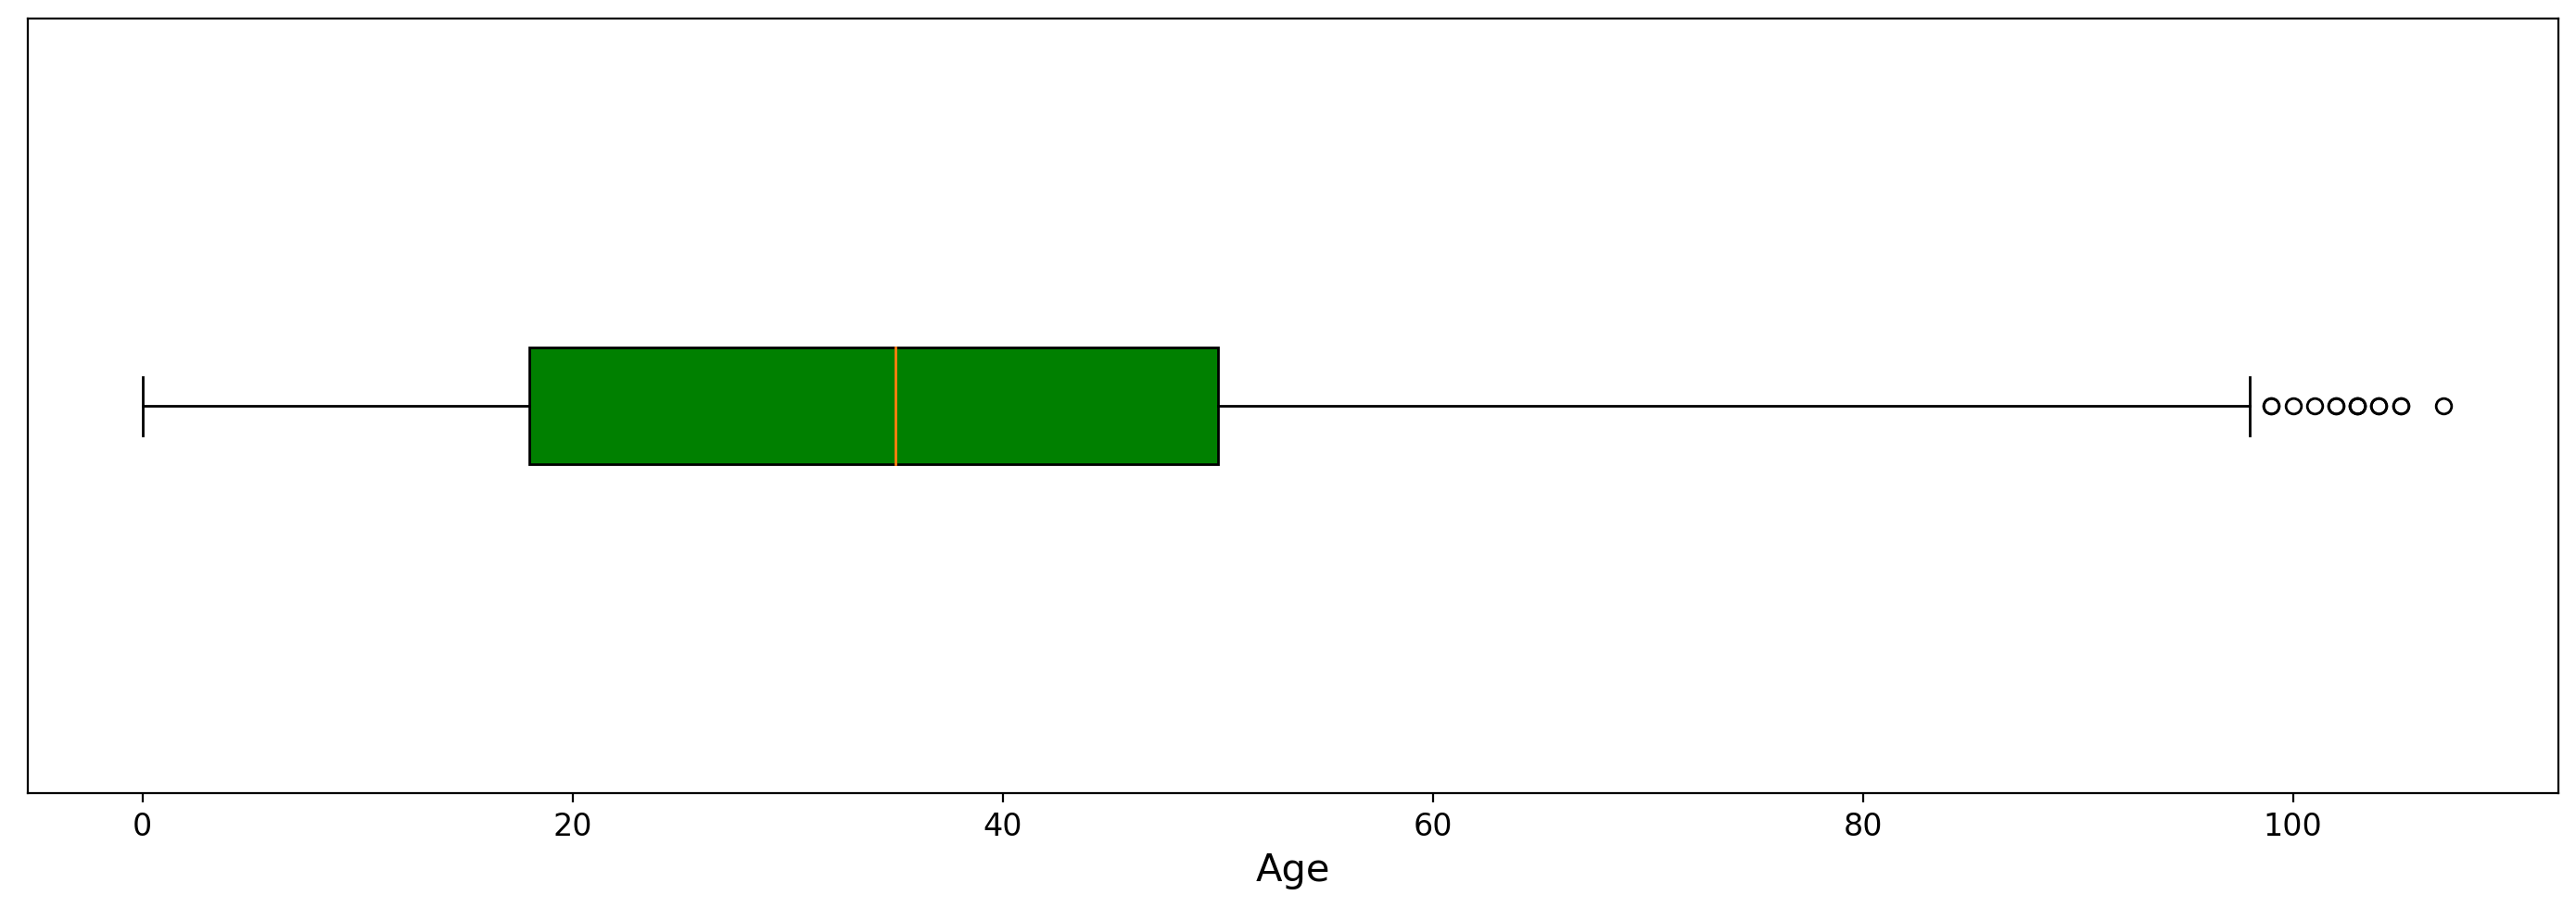

In [32]:
# Boxplot of the age column
fig, ax = plt.subplots(figsize=(14, 5), dpi=200)

# Create the boxplot using the age column of the dataframe
ax.boxplot(df["Age"], vert=False, showfliers=True, notch=False, patch_artist=True, boxprops=dict(facecolor='green', color='black'))

# Set the labels for the x and y axis and their font sizes
ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("", fontsize=0) # Remove y-label
ax.tick_params(axis='both', which='major', labelsize=12)

# Remove the ticks for the y-axis
ax.set_yticks([0])
ax.set_yticklabels([''])

# Adjust the layout of the plot to make it more compact
fig.tight_layout()

# Saving the plot as raw age
plt.savefig("Age_boxplot.png")
plt.show()


## Relationship to Head of House

In [33]:
df['Relationship to Head of House'].value_counts()

Head                     2991
Son                      1445
Daughter                 1421
Husband                   957
None                      600
Wife                      335
Partner                   265
Lodger                    263
Granddaughter              65
Grandson                   60
Sibling                    36
Cousin                     27
Visitor                    20
Adopted Daughter           18
Adopted Son                17
Neice                      16
Nephew                     13
Step-Son                   13
Step-Daughter              11
                            2
Son-in-law                  1
Adopted Granddaughter       1
Name: Relationship to Head of House, dtype: int64

In [34]:
df['Relationship to Head of House'].isnull().sum()

0

In [35]:
df['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Visitor', 'Son', 'Daughter', 'Partner', 'Husband',
       'None', 'Lodger', 'Grandson', 'Adopted Son', 'Granddaughter',
       'Sibling', 'Step-Daughter', 'Adopted Daughter', 'Nephew',
       'Step-Son', 'Cousin', 'Neice', 'Son-in-law', ' ',
       'Adopted Granddaughter'], dtype=object)

In [36]:
(df['Relationship to Head of House'] == ' ').sum()

2

#### Manual cleaning since these are only two

In [37]:
df[df['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5348,21,Repton Drive,Gary,Fisher,16,,NaN,Male,Student,None,NaN
8230,15,Potts Valley,Michael,Webb,18,,Divorced,Male,Student,None,None


In [38]:
df[(df['Street'] == 'Repton Drive') & (df['House Number'] == 21) &  (df['Surname'] == 'Fisher')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5346,21,Repton Drive,Anna,Fisher,55,Head,Single,Female,Unemployed,None,Christian
5348,21,Repton Drive,Gary,Fisher,16,,NaN,Male,Student,None,NaN


In [39]:
df.loc[(df['House Number'] == 21) & (df['Street'] == 'Repton Drive') & (df['Relationship to Head of House'] == ' '), 'Relationship to Head of House'] = 'Son'

In [40]:
df[(df['Street'] == 'Repton Drive') & (df['House Number'] == 21) &  (df['Surname'] == 'Fisher')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5346,21,Repton Drive,Anna,Fisher,55,Head,Single,Female,Unemployed,None,Christian
5348,21,Repton Drive,Gary,Fisher,16,Son,NaN,Male,Student,None,NaN


In [41]:
df[df['Relationship to Head of House'].str.isspace()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8230,15,Potts Valley,Michael,Webb,18,,Divorced,Male,Student,None,None


In [42]:
df[(df['Street'] == 'Potts Valley') & (df['House Number'] == 15) &  (df['Surname'] == 'Webb')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8228,15,Potts Valley,Naomi,Webb,42,Head,Married,Female,Firefighter,None,Catholic
8229,15,Potts Valley,Justin,Webb,46,Husband,Married,Male,Unemployed,None,Catholic
8230,15,Potts Valley,Michael,Webb,18,,Divorced,Male,Student,None,None


#### Replacing the empty cells

In [43]:
df[(df['Street'] == 'Potts Valley') & (df['House Number'] == 15) &  (df['Surname'] == 'Webb')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8228,15,Potts Valley,Naomi,Webb,42,Head,Married,Female,Firefighter,None,Catholic
8229,15,Potts Valley,Justin,Webb,46,Husband,Married,Male,Unemployed,None,Catholic
8230,15,Potts Valley,Michael,Webb,18,,Divorced,Male,Student,None,None


In [44]:
df.loc[(df['House Number'] == 15) & (df['Street'] == 'Potts Valley') & (df['Relationship to Head of House'] == ' '), 'Relationship to Head of House'] = 'Son'

In [45]:
df[(df['Street'] == 'Potts Valley') & (df['House Number'] == 15) &  (df['Surname'] == 'Webb')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8228,15,Potts Valley,Naomi,Webb,42,Head,Married,Female,Firefighter,None,Catholic
8229,15,Potts Valley,Justin,Webb,46,Husband,Married,Male,Unemployed,None,Catholic
8230,15,Potts Valley,Michael,Webb,18,Son,Divorced,Male,Student,None,None


In [46]:
df['Relationship to Head of House'].unique()

array(['Head', 'Wife', 'Visitor', 'Son', 'Daughter', 'Partner', 'Husband',
       'None', 'Lodger', 'Grandson', 'Adopted Son', 'Granddaughter',
       'Sibling', 'Step-Daughter', 'Adopted Daughter', 'Nephew',
       'Step-Son', 'Cousin', 'Neice', 'Son-in-law',
       'Adopted Granddaughter'], dtype=object)

## Marital Status

In [47]:
df['Marital Status'].value_counts()


Single      2831
Married     2602
Divorced     753
Widowed      306
Name: Marital Status, dtype: int64

In [48]:
#Missing rows in data
df['Marital Status'].isnull().sum()

2085

In [49]:
(df['Marital Status'] == ' ').sum()

0

In [50]:
#df[(df['Marital Status'] == 'Married') & (df['Age'] == 18) ]
df.query("Age <18 and `Marital Status` == 'Married'") # check age < 18 and married

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [51]:
#df[(df['Marital Status'] == 'Divorced') & (df['Age'] == 18) ]

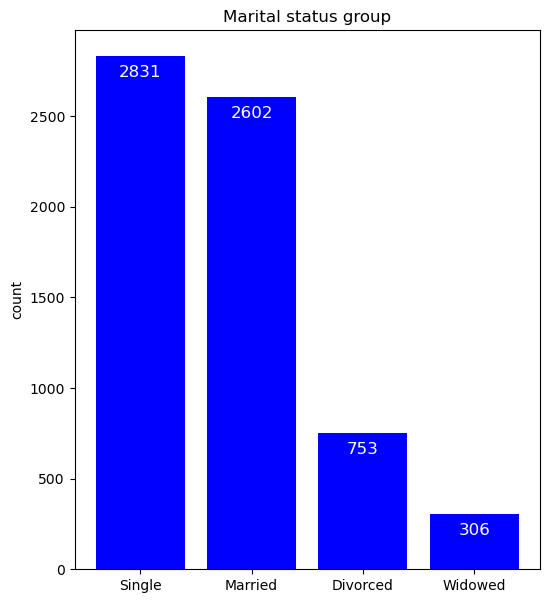

In [52]:
# Plot marital status distribution before cleaning
Marital_status_count = df['Marital Status'].value_counts()
plt.figure(figsize=(6,7))
plt.bar(Marital_status_count.index, Marital_status_count.values, color="blue")
plt.title('Marital status group')
plt.ylabel('count')

for i, value in enumerate(Marital_status_count.values):
    plt.text(i, value-90, str(value), fontsize=12, color='white',horizontalalignment='center', verticalalignment='center')
plt.savefig('marital_status_group.png')
plt.show()

#### Checking to see ages less than 18

In [53]:
df[(df['Marital Status'].isnull()) & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
11,4,Turkey Gardens,Maureen,Nicholson,9,Daughter,NaN,Female,Student,None,NaN
15,5,Turkey Gardens,Georgina,Williams-Evans,17,Daughter,NaN,Female,Student,None,NaN
20,6,Turkey Gardens,Hilary,Thomas,3,Daughter,NaN,Female,Child,None,NaN
39,14,Turkey Gardens,Vanessa,Jackson,2,Daughter,NaN,Female,Child,None,NaN
40,14,Turkey Gardens,Pamela,Jackson,1,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8571,1,Simmons Delve,Jonathan,Goodwin,0,None,NaN,Male,Child,None,NaN
8573,1,Lomond Manor,Vincent,Newman,9,Son,NaN,Male,Student,None,NaN
8574,1,Lomond Manor,Louise,Butler-Newman,8,Daughter,NaN,Female,Student,None,NaN
8575,1,Lomond Manor,Trevor,Butler-Newman,4,Son,NaN,Male,Child,None,NaN


### Replaced it with single since they are all less than 18

In [54]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single', 'Widowed', nan], dtype=object)

In [55]:
#(df[(df['Marital Status'].isnull()) & (df['Age'] < 18)])

In [56]:
if df['Marital Status'].isnull().sum() == len(df[(df['Marital Status'].isnull()) & (df['Age'] < 18)]):
    df['Marital Status'].fillna(value = 'Single' , inplace=True) 

In [57]:
(df['Marital Status'].isnull()).sum()

0

In [58]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single', 'Widowed'], dtype=object)

In [59]:
(df['Marital Status'].isnull()).sum()

0

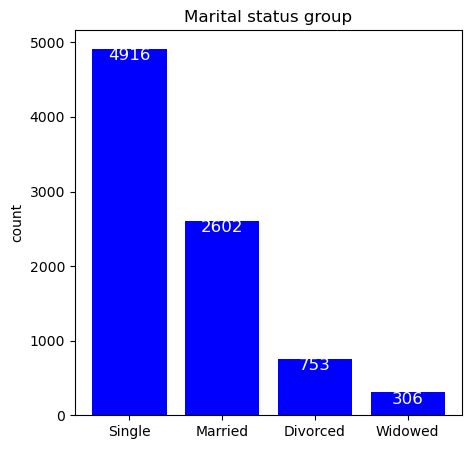

In [60]:
# Plot marital status distribution after cleaning
Marital_status_count = df['Marital Status'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(Marital_status_count.index, Marital_status_count.values, color="blue")
plt.title('Marital status group')
plt.ylabel('count')

for i, value in enumerate(Marital_status_count.values):
    plt.text(i, value-90, str(value), fontsize=12, color='white',horizontalalignment='center', verticalalignment='center')
plt.savefig('marital_status_updated.png')
plt.show()

In [61]:
 df['Marital Status'].value_counts()

Single      4916
Married     2602
Divorced     753
Widowed      306
Name: Marital Status, dtype: int64

<Figure size 1200x1000 with 0 Axes>

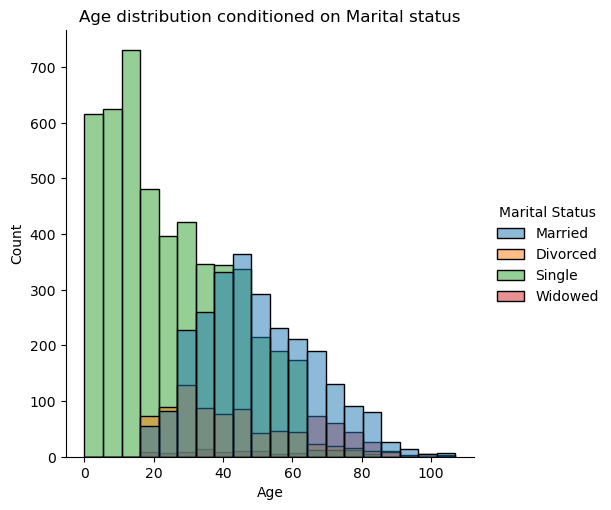

In [140]:
plt.figure(figsize=(12,10))
sns.displot(df, x='Age', bins=20, hue='Marital Status').set(title = 'Age distribution conditioned on Marital status')
#plt.savefig('age_dist_marital')
plt.show()

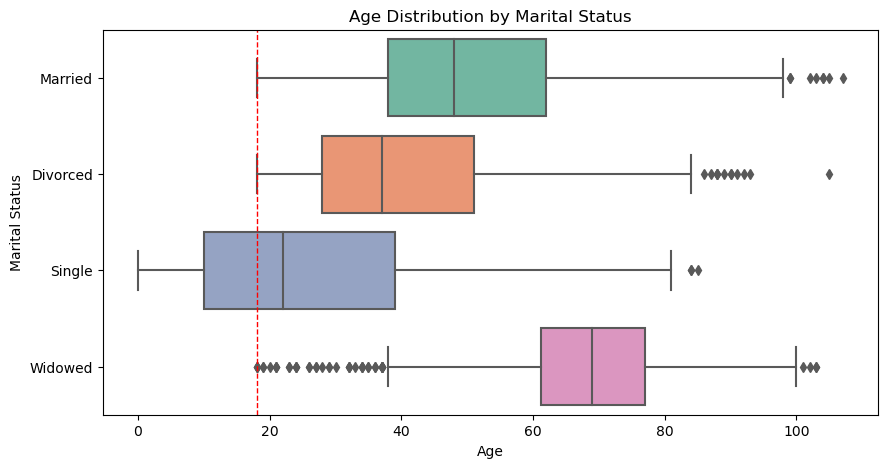

In [141]:
# Create the boxplot of age by marital status
plt.figure(figsize=(10,5))
sns.boxplot(x='Age', y='Marital Status', data=df, palette='Set2')
plt.axvline(18,color='r',linestyle='dashed',linewidth=1) #add Minor age line

# Set chart title and axis labels
plt.title('Age Distribution by Marital Status')
plt.xlabel('Age')
plt.ylabel('Marital Status')

# Save the chart to a file
plt.savefig('age_marital_status_boxplot')


## Gender (no issues here)

In [64]:
df['Gender'].value_counts()


Female    4501
Male      4076
Name: Gender, dtype: int64

In [65]:
df['Gender'].isnull().sum()


0

In [66]:
(df['Gender'] == ' ').sum()

0

In [67]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## Occupation

In [68]:
df['Occupation'].value_counts()

Student                                    1680
University Student                          514
Unemployed                                  513
Child                                       489
Advertising art director                     18
                                           ... 
Retired Barista                               1
Retired Pharmacist, community                 1
Retired Environmental education officer       1
Retired Higher education lecturer             1
Retired Hospital pharmacist                   1
Name: Occupation, Length: 1070, dtype: int64

In [69]:
(df['Occupation'] == ' ').sum()

0

In [70]:
df['Occupation'].value_counts()

Student                                    1680
University Student                          514
Unemployed                                  513
Child                                       489
Advertising art director                     18
                                           ... 
Retired Barista                               1
Retired Pharmacist, community                 1
Retired Environmental education officer       1
Retired Higher education lecturer             1
Retired Hospital pharmacist                   1
Name: Occupation, Length: 1070, dtype: int64

### Assumption based on ritirement law in UK

In [71]:
len(df[(df['Occupation'] == 'Unemployed') & (df['Age'] >= 65)])

40

In [72]:
df[(df['Occupation'] == 'Unemployed') & (df['Age'] >= 65)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
287,18,Summer Crescent,Naomi,Hall,78,Head,Widowed,Female,Unemployed,None,Christian
290,19,Summer Crescent,Kathleen,Humphreys,81,Head,Widowed,Female,Unemployed,None,Methodist
367,45,Summer Crescent,Ruth,Cooper,67,Head,Widowed,Female,Unemployed,None,Christian
481,19,Barlow Pike,Patrick,Hurst,85,Husband,Married,Male,Unemployed,None,Christian
776,8,Column Avenue,Kate,Khan,66,Head,Widowed,Female,Unemployed,None,Christian
827,29,Column Avenue,Mohammad,Smith,66,Head,Divorced,Male,Unemployed,None,Methodist
1021,100,Column Avenue,Barry,James,65,Husband,Married,Male,Unemployed,None,Christian
1338,30,Singh Forge,Lynn,Taylor,65,Wife,Married,Female,Unemployed,None,None
1898,13,Rosetap Road,Lawrence,Carey,65,Husband,Married,Male,Unemployed,None,None
2153,20,Wilson Views,Louise,Banks,67,Head,Widowed,Female,Unemployed,None,Christian


In [73]:
df.loc[(df['Occupation'] == 'Unemployed') & (df['Age'] >= 65) & (df['Occupation'] == 'Unemployed'), 'Occupation'] = 'Retired'

In [74]:
print(df['Occupation'].nunique())

1071


In [75]:
# Grouping the retired occupation
for i in df['Occupation']:
   
    if i.startswith('Retired'):
        
        print((i))

Retired Freight forwarder
Retired Intelligence analyst
Retired Horticultural therapist
Retired Manufacturing engineer
Retired Herbalist
Retired Location manager
Retired Ergonomist
Retired Museum/gallery curator
Retired Sports coach
Retired Field seismologist
Retired IT technical support officer
Retired Restaurant manager
Retired Teacher, special educational needs
Retired Surveyor, building control
Retired Clinical cytogeneticist
Retired Fashion designer
Retired Social researcher
Retired Hospital doctor
Retired
Retired
Retired Nature conservation officer
Retired
Retired Building services engineer
Retired Further education lecturer
Retired Health physicist
Retired Special educational needs teacher
Retired Lobbyist
Retired Fitness centre manager
Retired Programmer, multimedia
Retired Private music teacher
Retired Professor Emeritus
Retired Building services engineer
Retired
Retired Financial adviser
Retired Therapist, drama
Retired Rural practice surveyor
Retired Therapist, horticultural


## Infirmity

In [76]:
df['Infirmity'].value_counts()

None                   8496
Physical Disability      16
Deaf                     15
Mental Disability        12
Unknown Infection        11
Blind                    10
Disabled                 10
                          7
Name: Infirmity, dtype: int64

In [77]:
df['Infirmity'].isnull().sum()


0

In [78]:
df['Infirmity'].unique()

array(['None', 'Deaf', 'Physical Disability', 'Unknown Infection',
       'Blind', 'Disabled', 'Mental Disability', ' '], dtype=object)

In [79]:
(df['Infirmity'] == ' ').sum()

7

In [80]:
df[df['Infirmity'].str.isspace()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1534,49,Polaris Crescent,Donna,Robinson,52,Head,Married,Female,Tax inspector,,Christian
3055,2,Obelisk Orchard,Lucy,Allen,41,Head,Single,Female,"Journalist, broadcasting",,None
3313,25,Harvey Dale,Robert,Parker,6,Son,Single,Male,Student,,NaN
3639,14,Wales Crescent,Peter,Hall,4,Son,Single,Male,Child,,NaN
4676,48,Parrot Crescent,Wendy,Phillips,2,Daughter,Single,Female,Child,,NaN
4775,24,Smith Divide,Joanne,Gregory,61,Cousin,Single,Female,Geographical information systems officer,,Methodist
5398,42,Repton Drive,Marc,Jones,28,Husband,Married,Male,Freight forwarder,,None


In [81]:
# replacing empty rows with the 'mode' , I went through them individually and realised they were none
# By imputing the same household, even though that might not be the case
df['Infirmity'] = np.where((df['Infirmity'] == ' '), df['Infirmity'].mode()[0], df['Infirmity'])

In [82]:
(df['Infirmity'] == ' ').sum()

0

## Religion

In [83]:
df['Religion'].isnull().sum()

2132

In [84]:
df['Religion'].unique()

array(['None', 'Christian', nan, 'Methodist', 'Catholic', 'Jewish',
       'Muslim', 'Sikh', 'Undecided', 'Sith', 'Hindu', 'Buddist',
       'Baptist', 'Bahai', ' '], dtype=object)

In [85]:
# Sorted age groups with missing religion
print(sorted(df[df['Religion'].isnull()]['Age'].unique())) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26]


In [86]:
# Get number of Minors with missing religion
minors_with_missing_religion = df[(df['Religion'].isnull()) & (df['Age'] < 18)].shape[0]
print(f"The number of minors with missing Religion: {minors_with_missing_religion}")

# Get number of Adults with missing religion
adults_with_missing_religion = df[(df['Religion'].isnull()) & (df['Age'] >= 18)].shape[0]
print(f"The number of adults with missing Religion: {adults_with_missing_religion}")

The number of minors with missing Religion: 2085
The number of adults with missing Religion: 47


#### Replacing nan Religion with age less than 18 with the same surname, house number and street with equal religion
#### The assumption being the child would eventually come to like the religion since their household is the same religion
####  Even though it is not always the case, but the probability is high

In [87]:
df[(df['Religion'].isnull()) & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
11,4,Turkey Gardens,Maureen,Nicholson,9,Daughter,Single,Female,Student,None,NaN
15,5,Turkey Gardens,Georgina,Williams-Evans,17,Daughter,Single,Female,Student,None,NaN
20,6,Turkey Gardens,Hilary,Thomas,3,Daughter,Single,Female,Child,None,NaN
39,14,Turkey Gardens,Vanessa,Jackson,2,Daughter,Single,Female,Child,None,NaN
40,14,Turkey Gardens,Pamela,Jackson,1,Daughter,Single,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8571,1,Simmons Delve,Jonathan,Goodwin,0,None,Single,Male,Child,None,NaN
8573,1,Lomond Manor,Vincent,Newman,9,Son,Single,Male,Student,None,NaN
8574,1,Lomond Manor,Louise,Butler-Newman,8,Daughter,Single,Female,Student,None,NaN
8575,1,Lomond Manor,Trevor,Butler-Newman,4,Son,Single,Male,Child,None,NaN


In [88]:
# This groups the empty religion that is less than 18 years with the same house number, street and surname and imputes the same religion
df.loc[(df['Religion'].isnull()) & (df['Age'] < 18), 'Religion'] = \
    df.groupby(['House Number', 'Street', 'Surname'])['Religion'].transform('first')


In [89]:
# Checking the minor and adults empty religion
minors_with_missing_religion = df[(df['Religion'].isnull()) & (df['Age'] < 18)].shape[0]
print(f"The number of minors with missing Religion: {minors_with_missing_religion}")

# Get number of Adults with missing religion
adults_with_missing_religion = df[(df['Religion'].isnull()) & (df['Age'] >= 18)].shape[0]
print(f"The number of adults with missing Religion: {adults_with_missing_religion}")

The number of minors with missing Religion: 276
The number of adults with missing Religion: 47


In [90]:
# These minors are in the same house but with different surnames, hence Unknown since they are not known
df.loc[(df['Religion'].isnull()) & (df['Age'] < 18), 'Religion'] = 'Unknown'

In [91]:
# Checking the minor and adults empty religion
minors_with_missing_religion = df[(df['Religion'].isnull()) & (df['Age'] < 18)].shape[0]
print(f"The number of minors with missing Religion: {minors_with_missing_religion}")

# Get number of Adults with missing religion
adults_with_missing_religion = df[(df['Religion'].isnull()) & (df['Age'] >= 18)].shape[0]
print(f"The number of adults with missing Religion: {adults_with_missing_religion}")

The number of minors with missing Religion: 0
The number of adults with missing Religion: 47


In [92]:
# These adults did not provide information on their religious beliefs, hence 'Unknown'
df.loc[(df['Religion'].isnull()) & (df['Age'] >= 18), 'Religion'] = 'Unknown'

In [93]:
(df['Religion'] == ' ').sum()

2

In [94]:
df.loc[(df['Religion'] == ' '), 'Religion'] = 'Unknown'

In [95]:
# Checking the minor and adults empty religion
minors_with_missing_religion = df[(df['Religion'].isnull()) & (df['Age'] < 18)].shape[0]
print(f"The number of minors with missing Religion: {minors_with_missing_religion}")

# Get number of Adults with missing religion
adults_with_missing_religion = df[(df['Religion'].isnull()) & (df['Age'] >= 18)].shape[0]
print(f"The number of adults with missing Religion: {adults_with_missing_religion}")

The number of minors with missing Religion: 0
The number of adults with missing Religion: 0


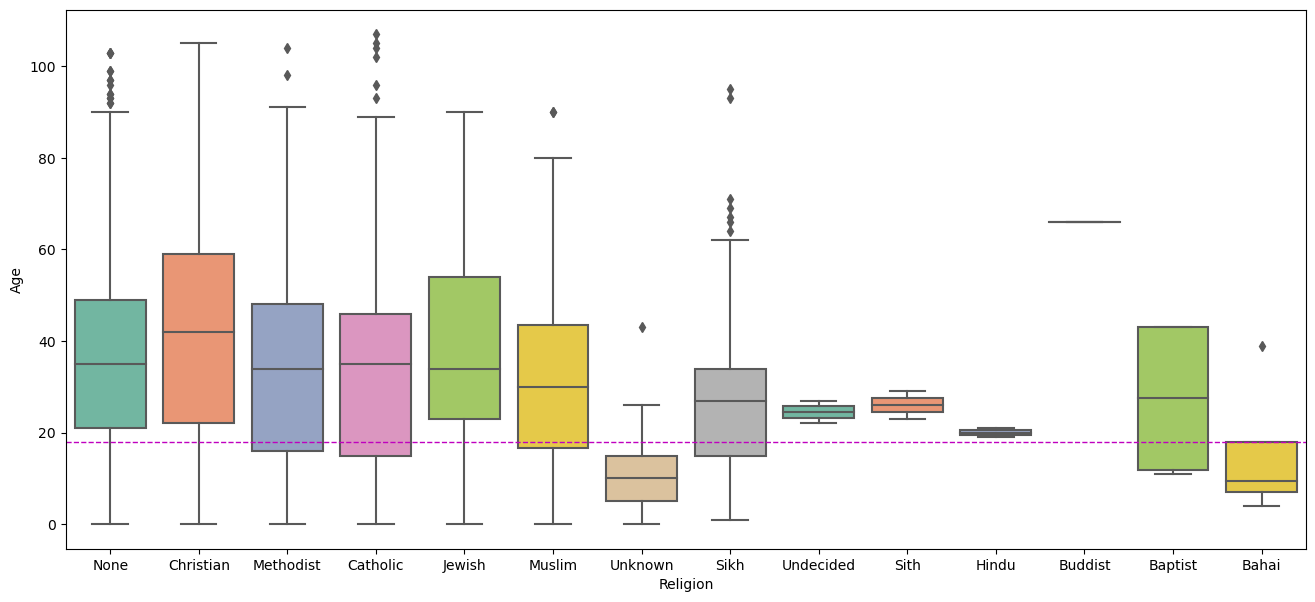

In [142]:
# plotting the Age on the charts with respect to religion
plt.figure(figsize=(16,7))
sns.boxplot(x = 'Religion', y = 'Age', data = df, palette='Set2')
plt.axhline(18,color='m',linestyle='dashed',linewidth=1)
plt.savefig('age_religion_boxplot')

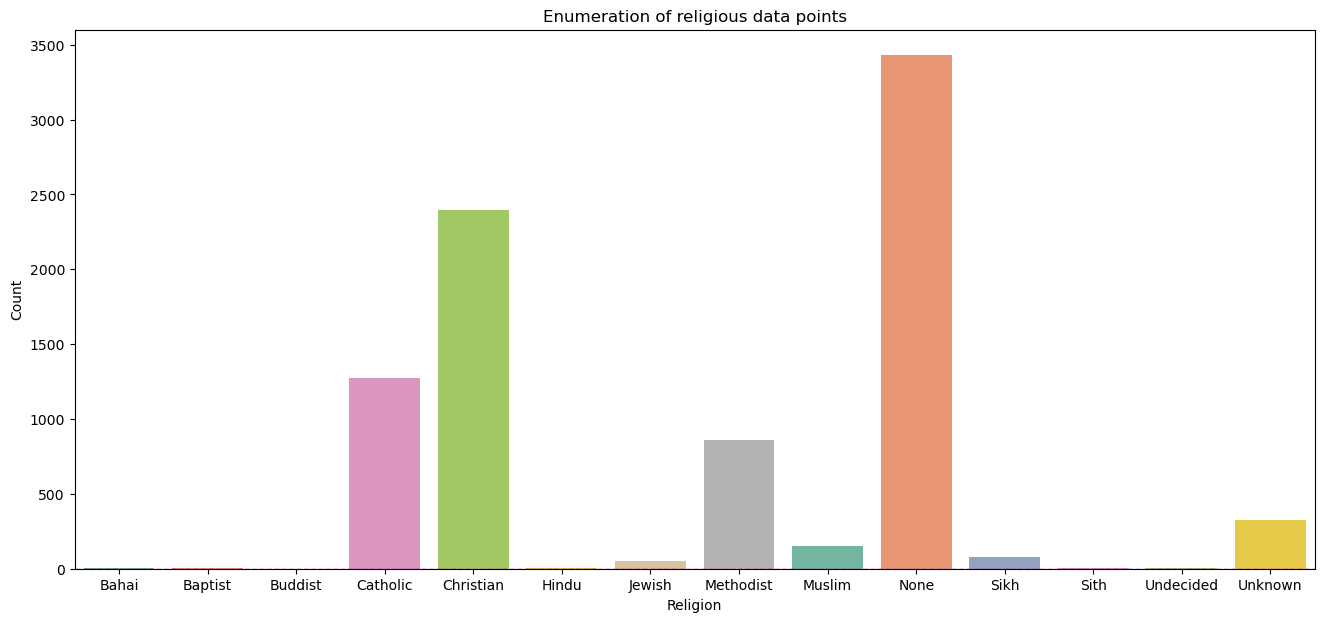

In [97]:
# Group data by religion and count the number of records for each group
religion_counts = df.groupby('Religion')['Age'].count().reset_index()

# Create the bar chart
plt.figure(figsize=(16,7))
sns.barplot(x='Religion', y='Age', data=religion_counts, palette='Set2')
plt.axhline(0,color='m',linestyle='dashed',linewidth=1)

# Set chart title and axis labels
plt.title('Enumeration of religious data points')
plt.xlabel('Religion')
plt.ylabel('Count')

# Save the chart to a file
plt.savefig('religion_counts_barchart')


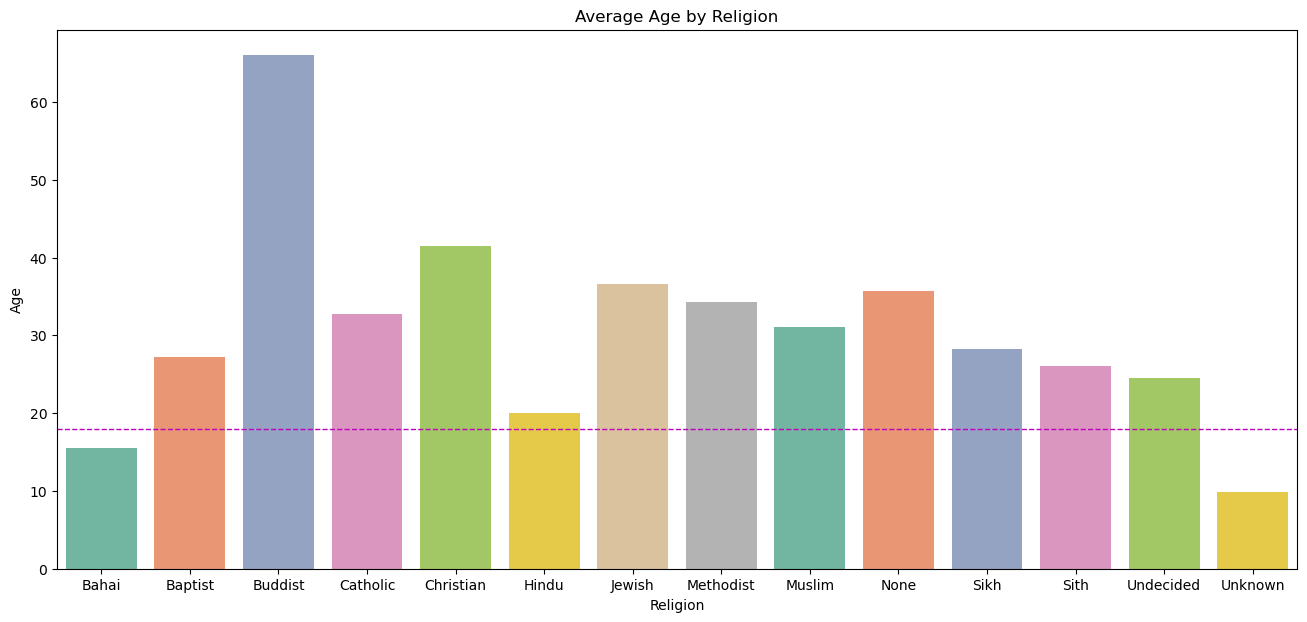

In [98]:
# Group data by religion and calculate the mean age for each group
religion_ages = df.groupby('Religion')['Age'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(16,7))
sns.barplot(x='Religion', y='Age', data=religion_ages, palette='Set2')
plt.axhline(18,color='m',linestyle='dashed',linewidth=1)

# Set chart title and axis labels
plt.title('Average Age by Religion')
plt.xlabel('Religion')
plt.ylabel('Age')

# Save the chart to a file
plt.savefig('age_religion_barchart')


In [99]:
df.isna().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

## data cleaned now

In [100]:
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Turkey Gardens,Alexander,Macdonald,21,Head,Married,Male,Sports development officer,None,None
1,1,Turkey Gardens,Yvonne,Macdonald,19,Wife,Married,Female,University Student,None,None
2,2,Turkey Gardens,Louise,Taylor,38,Head,Divorced,Female,Mining engineer,None,Christian
3,2,Turkey Gardens,Philip,Harding,55,Visitor,Single,Male,Quarry manager,None,Christian
4,3,Turkey Gardens,Rachael,Evans,78,Head,Widowed,Female,Retired Freight forwarder,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8572,1,Lomond Manor,Rita,Newman,40,Head,Divorced,Female,Advertising copywriter,None,Methodist
8573,1,Lomond Manor,Vincent,Newman,9,Son,Single,Male,Student,None,Methodist
8574,1,Lomond Manor,Louise,Butler-Newman,8,Daughter,Single,Female,Student,None,Unknown
8575,1,Lomond Manor,Trevor,Butler-Newman,4,Son,Single,Male,Child,None,Unknown


In [101]:
# save cleaned dataframe to csv file
df.to_csv('census20_cleaned.csv') 

In [102]:

df_cleaned = pd.read_csv("census20_cleaned.csv", index_col=0)
df_clean = df_cleaned.copy()   #this copies the original data
df_clean.isna().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

#### Statistics Analysis on the df_clean data

In [103]:
Age = df_clean['Age']

In [104]:
# statiscal info of numerical data
df_clean.describe(exclude='object').transpose() 

,count,mean,std,min,25%,50%,75%,max
House Number,8577.0,37.082896,44.790872,1.0,9.0,21.0,42.0,220.0
Age,8577.0,35.593098,21.376178,0.0,18.0,35.0,50.0,107.0


In [105]:
# statiscal info of categorical data
df_clean.describe(include='object').transpose() 

,count,unique,top,freq
Street,8577,104,Faith Street,708
First Name,8577,364,Anna,41
Surname,8577,672,Smith,223
Relationship to Head of House,8577,21,Head,2991
Marital Status,8577,4,Single,4916
Gender,8577,2,Female,4501
Occupation,8577,1071,Student,1680
Infirmity,8577,7,None,8503
Religion,8577,14,None,3429


#### Age distirbution of Male and females

<Figure size 1200x1000 with 0 Axes>

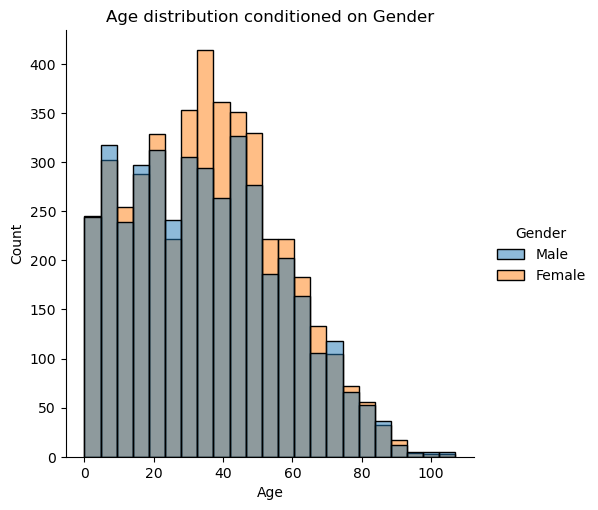

In [106]:
plt.figure(figsize=(12,10))
sns.displot(df_clean, x='Age', bins=23, hue='Gender').set(title = 'Age distribution conditioned on Gender')
plt.show()

### Create Age Pyramide to visualize age groups

In [107]:
def age_grouper(age):
    # This function classifies age range in 5 years interval
    if age < 5:
        return '0-04'
    elif age < 10:
        return '05-09'
    elif age < 15:
        return '10-14'
    elif age < 20:
        return '15-19'
    elif age < 25:
        return '20-24'
    elif age < 30:
        return '25-29'
    elif age < 35:
        return '30-34'
    elif age < 40:
        return '35-39'
    elif age < 45:
        return '40-44'
    elif age < 50:
        return '45-49'
    elif age < 55:
        return '50-54'
    elif age < 60:
        return '55-59'
    elif age < 65:
        return '60-64'
    elif age < 70:
        return '65-69'
    elif age < 75:
        return '70-74'
    elif age < 80:
        return '75-79'
    elif age < 85:
        return '80-84'
    elif age < 90:
        return '85-89'
    elif age < 95:
        return '90-94'
    elif age < 100:
        return '95-99'
    else:
        return '>=100'


In [108]:
# Applying function on the cleaned data with Age column
df_clean['Age Range'] = df_clean['Age'].apply(age_grouper)

In [109]:
df_clean.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Range
0,1,Turkey Gardens,Alexander,Macdonald,21,Head,Married,Male,Sports development officer,None,None,20-24
1,1,Turkey Gardens,Yvonne,Macdonald,19,Wife,Married,Female,University Student,None,None,15-19
2,2,Turkey Gardens,Louise,Taylor,38,Head,Divorced,Female,Mining engineer,None,Christian,35-39
3,2,Turkey Gardens,Philip,Harding,55,Visitor,Single,Male,Quarry manager,None,Christian,55-59
4,3,Turkey Gardens,Rachael,Evans,78,Head,Widowed,Female,Retired Freight forwarder,None,Christian,75-79


In [110]:
df_clean.groupby('Age Range')['Gender'].value_counts()

Age Range  Gender
0-04       Female    245
           Male      244
05-09      Male      318
           Female    302
10-14      Female    318
           Male      291
15-19      Male      312
           Female    307
20-24      Male      299
           Female    293
25-29      Female    300
           Male      298
30-34      Female    380
           Male      310
35-39      Female    434
           Male      306
40-44      Female    402
           Male      333
45-49      Female    350
           Male      298
50-54      Female    277
           Male      251
55-59      Female    240
           Male      201
60-64      Female    199
           Male      179
65-69      Female    162
           Male      136
70-74      Male      118
           Female    105
75-79      Female     72
           Male       66
80-84      Female     67
           Male       62
85-89      Male       31
           Female     29
90-94      Female     10
           Male       10
95-99      Female      5
       

In [111]:
# Count number of males and females for each age group to construct age pyramide

gender_age_pyramide = df_clean.pivot_table('Age', index='Age Range', columns='Gender', aggfunc='count').reset_index()
gender_age_pyramide['Male'] = -gender_age_pyramide['Male']
age_group = list(reversed(gender_age_pyramide['Age Range'].to_list())) # sort age group in descending order
gender_age_pyramide

Gender,Age Range,Female,Male
0,0-04,245,-244
1,05-09,302,-318
2,10-14,318,-291
3,15-19,307,-312
4,20-24,293,-299
5,25-29,300,-298
6,30-34,380,-310
7,35-39,434,-306
8,40-44,402,-333
9,45-49,350,-298


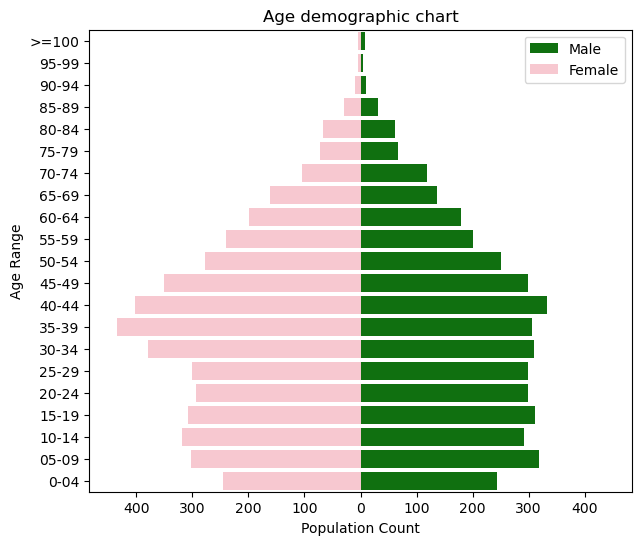

In [112]:
plt.figure(figsize=(7,6))
age_pyramid = sns.barplot(x='Male', y='Age Range', data=gender_age_pyramide, order=age_group, color='green', label='Male') 
age_pyramid = sns.barplot(x='Female', y='Age Range', data=gender_age_pyramide, order=age_group, color='pink', label='Female')
age_pyramid.xaxis.set_major_locator(ticker.FixedLocator(age_pyramid.get_xticks()))
age_pyramid.xaxis.set_ticklabels(abs(age_pyramid.get_xticks()).astype(int))

# Change the x-axis label to "Population Count"
age_pyramid.set_xlabel("Population Count")

# Reverse the order of the bars and center the plot at 0
age_pyramid.set_xlim(right=max(abs(gender_age_pyramide['Male'].max()), abs(gender_age_pyramide['Female'].max())) + 50, 
                     left=-max(abs(gender_age_pyramide['Male'].max()), abs(gender_age_pyramide['Female'].max())) - 50)
age_pyramid.invert_xaxis()
age_pyramid.set_xticklabels(abs(age_pyramid.get_xticks()).astype(int))

age_pyramid.legend()
plt.title('Age demographic chart', fontsize=12)
plt.savefig('Age_Demograph.png')


### Ratio of Adult to minor

In [113]:
# Add age_class columns: Minor ratio
df_clean['Age Category'] = np.where(df['Age']<18, 'Minor','Adult')

In [114]:
Age_Category = df_clean['Age Category'].value_counts()
Age_Category

Adult    6492
Minor    2085
Name: Age Category, dtype: int64

In [115]:
# function to get percent and counts of Gender
def my_fmt(x):
    return '{:.0f}\n({:.2f}%)'.format(total*x/100, x)

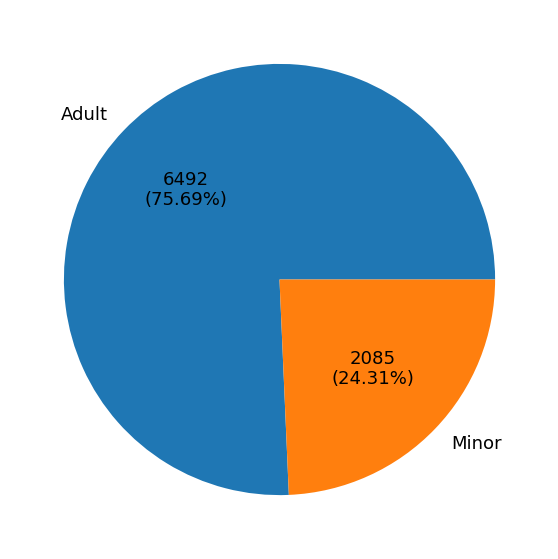

In [116]:
total = len(df_clean['Age Category'])
plt.figure(figsize=(7,7))
#plt.title('Grouped by Age Class')
plt.pie(Age_Category.values, labels=Age_Category.index, autopct=my_fmt, textprops={'fontsize':13})
plt.savefig('adult_minor_pie_chart.png')
plt.show()

### Religion

In [117]:
religions_count = df['Religion'].value_counts()
religions_count

None         3429
Christian    2395
Catholic     1272
Methodist     857
Unknown       325
Muslim        152
Sikh           81
Jewish         51
Baptist         4
Bahai           4
Undecided       2
Sith            2
Hindu           2
Buddist         1
Name: Religion, dtype: int64

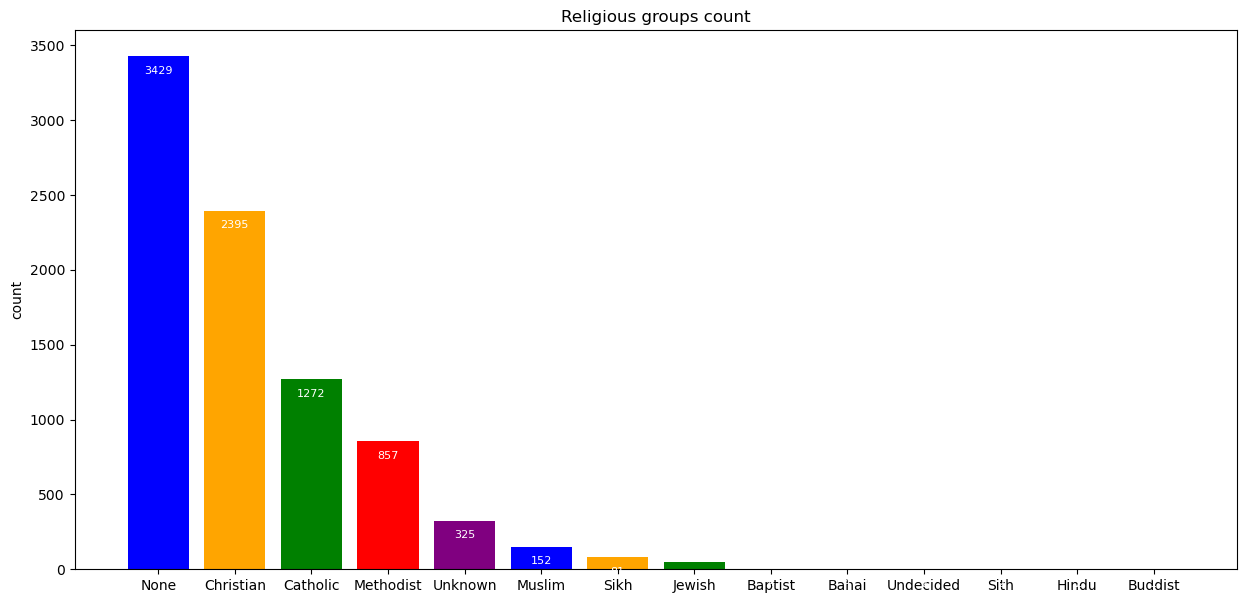

In [118]:
# Define the colors for each bar
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot marital status distribution after cleaning
plt.figure(figsize=(15,7))
plt.bar(religions_count.index, religions_count.values, color=colors)
plt.title('Religious groups count')
plt.ylabel('count')

# Add text labels to each bar
for i, value in enumerate(religions_count.values):
    plt.text(i, value-98, str(value), fontsize=8, color='white', horizontalalignment='center', verticalalignment='center')

# Save and show the plot
plt.savefig('religious_group_neat.png')
plt.show()


#### Looking at the number of undecided and the None barchat, majority of the people are unreligious, however, there will be a need to consider building a worship building for the christians, since their numbers are signicant compared to other religions

In [119]:
# Get mean, median, mode, min, and max of age for each religion
religion_age_range = pd.DataFrame(columns=['Religion', 'Mean', 'Median', 'Mode', 'Min', 'Max'])
for religion in df['Religion'].unique():
    age_subset = df.loc[df['Religion'] == religion, 'Age']
    religion_age_range = pd.concat([
        religion_age_range, 
        pd.DataFrame({
            'Religion': religion,
            'Mean': np.mean(age_subset),
            'Median': np.median(age_subset),
            'Mode': age_subset.mode().values[0],
            'Min': np.min(age_subset),
            'Max': np.max(age_subset)
        }, index=[0])
    ])

# Reset index
religion_age_range.reset_index(drop=True, inplace=True)


In [120]:
religion_age_range

,Religion,Mean,Median,Mode,Min,Max
0,None,35.718577,35.0,32,0,103
1,Christian,41.439666,42.0,51,0,105
2,Methodist,34.326721,34.0,32,0,104
3,Catholic,32.761006,35.0,40,0,107
4,Jewish,36.627451,34.0,6,0,90
5,Muslim,31.052632,30.0,19,0,90
6,Unknown,9.889231,10.0,18,0,43
7,Sikh,28.209877,27.0,3,1,95
8,Undecided,24.500000,24.5,22,22,27
9,Sith,26.000000,26.0,23,23,29


#### Analysis of Marital status

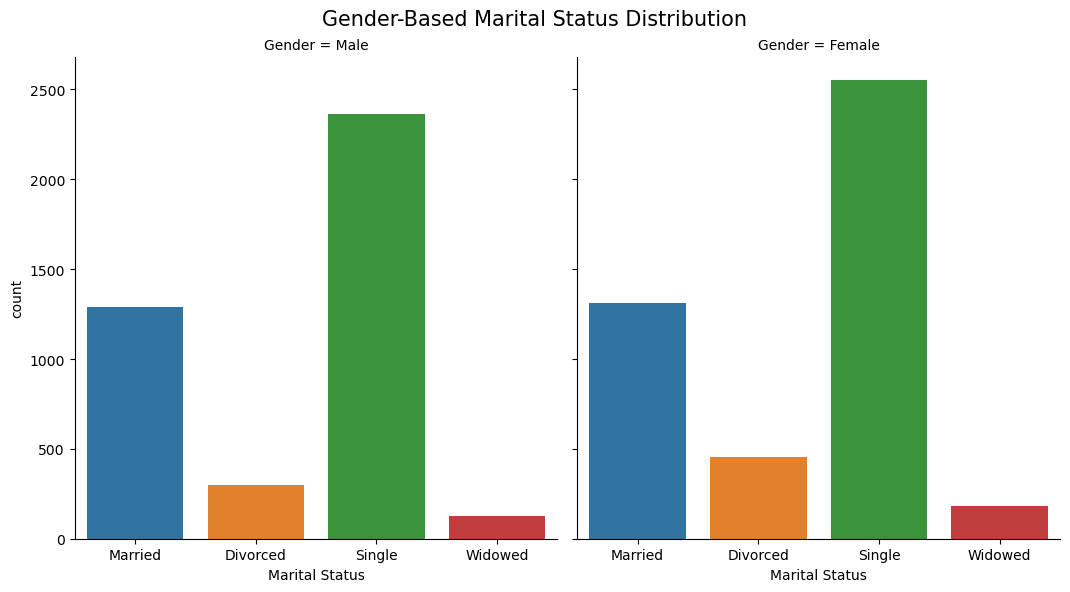

In [121]:
# marital status separated by gender
sns.catplot(data=df_clean, x='Marital Status', col='Gender', kind='count', height=6, aspect=.9)
plt.subplots_adjust(top=0.90)
plt.suptitle('Gender-Based Marital Status Distribution\n', fontsize=15)
plt.savefig('marital_status_gender_sep.png')
plt.show()

#### Almost same maried ratio, however, more widowed on the female than the male, tells me that the males die more in marriage.
#### Also, more divorced female ratio, could be that the males relocate after they are separated

#### Creating household category

In [122]:
# Grouping members in the same apartments as households
household = df_clean.groupby(['House Number', 'Street']).size().reset_index()
household.rename(columns={0:'Household'}, inplace=True)
household

,House Number,Street,Household
0,1,Aberdeen Knolls,2
1,1,Aethelstan Pass,2
2,1,Ahmed Haven,3
3,1,Albans Crescent,4
4,1,Allen Drive,3
...,...,...,...
2955,216,Faith Street,3
2956,217,Faith Street,3
2957,218,Faith Street,3
2958,219,Faith Street,5


In [123]:
# Numbering people in same apartment
househould_counts = household['Household'].value_counts().reset_index().rename(columns={'index':'Household','Household':'Count' })
househould_counts

,Household,Count
0,2,783
1,3,664
2,1,575
3,4,495
4,5,343
5,6,52
6,7,19
7,10,9
8,11,8
9,8,5


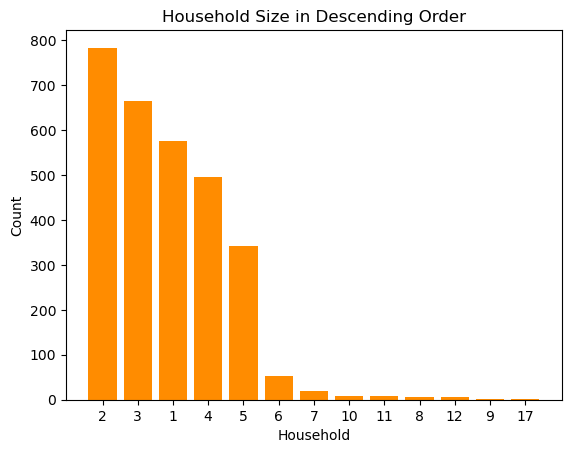

In [124]:
# Numbering people in same apartment
household_counts = household['Household'].value_counts().reset_index().rename(columns={'index':'Household','Household':'Count' })

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar chart
ax.bar(range(len(household_counts)), household_counts.Count, color='darkorange')

# Set axis labels and title
ax.set_xlabel('Household')
ax.set_ylabel('Count')
ax.set_title('Household Size in Descending Order')

# Set x-axis ticks and labels
ax.set_xticks(range(len(household_counts)))
ax.set_xticklabels(household_counts.Household)

# Show the plot
plt.show()


#### Looking at this graph, it shows small percentage of people live in households more than six

#### Analyse of Occupation and Commuters

In [125]:
# Add occupation category: Student(Minor), Student(University), Employed, Unemployed, Retired
occupation_groups = []
for x in df_clean['Occupation']:
    if 'retired' in x.lower():
        occupation_groups.append('Retired')
    elif 'unemployed' in x.lower():
        occupation_groups.append('Unemployed')
    elif 'university student' in x.lower(): 
        occupation_groups.append('Student(University)')
    elif 'phd student' in x.lower(): 
        occupation_groups.append('Student(University)')
    elif 'student' in x.lower():
        occupation_groups.append('Student(Minor)')
    else:
        occupation_groups.append('Employed')

In [126]:
df_clean['occupation_category']= pd.Series(occupation_groups)

In [127]:
df_clean.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion', 'Age Range', 'Age Category',
       'occupation_category'],
      dtype='object')

In [128]:
occupation_cat_count = df_clean['occupation_category'].value_counts()
occupation_cat_count

Employed               5170
Student(Minor)         1680
Retired                 724
Student(University)     530
Unemployed              473
Name: occupation_category, dtype: int64

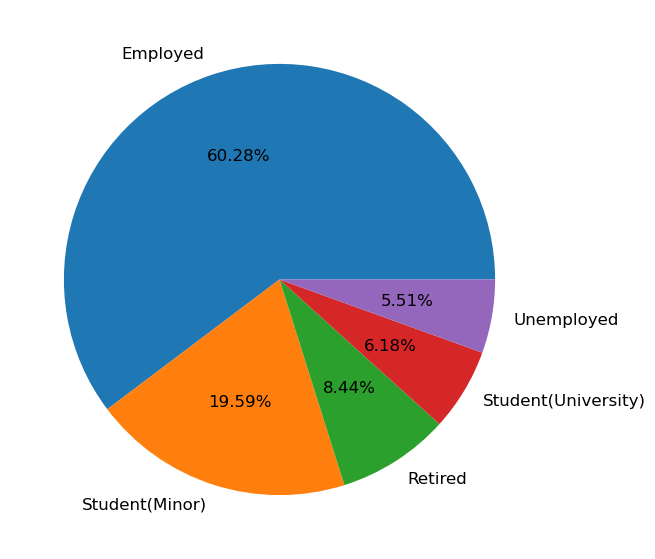

In [129]:
total = len(df_clean['occupation_category'])
plt.figure(figsize=(7,7))
plt.pie(occupation_cat_count.values, labels=occupation_cat_count.index, autopct='%1.2f%%', textprops={'fontsize':12})
plt.savefig('employment_pie_chart.png')
plt.show()

In [130]:
students_counts = df_clean[df_clean['occupation_category'].str.contains('Student')]['occupation_category'].value_counts()
students_counts

Student(Minor)         1680
Student(University)     530
Name: occupation_category, dtype: int64

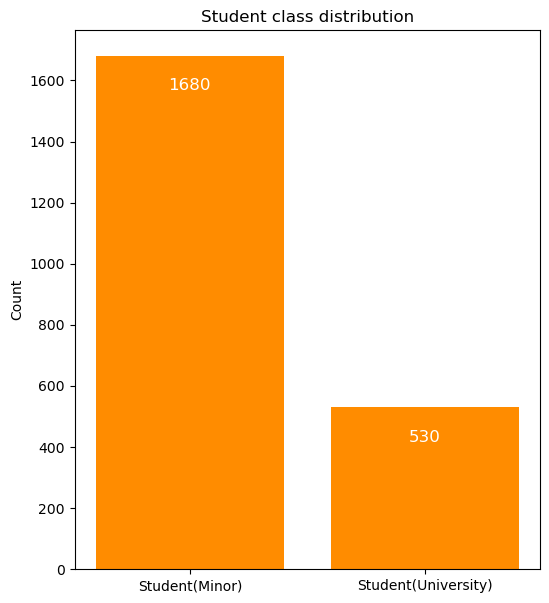

In [131]:
# Plot the distribution of student levels in the cleaned dataset
plt.figure(figsize=(6, 7))
plt.bar(students_counts.index, students_counts.values, color='darkorange')
plt.ylabel('Count')
for i, value in enumerate(students_counts.values):
    plt.text(i, value-98, str(value), fontsize=12, color='white',horizontalalignment='center', verticalalignment='center')
plt.title('Student class distribution')
plt.savefig('student_class_distribution.png')
plt.show()


## Birth rate

In [132]:
children_aged_zero = df_clean.query('Age == 0').shape[0] # get number of children aged zero
potential_women = df.query('23 <= Age <= 31').shape[0] # number of potential women: assuming child bearing age between 23-31
birth_rate = children_aged_zero/potential_women # calc birth rate
birth_rate_per_1000 = birth_rate * 100
print(f"Number of babies aged zero: {children_aged_zero}\nNumber of potential women: {potential_women}\n\
Birth rate: {birth_rate:.2f}\nBirth rate per 1000 women: {birth_rate_per_1000:.2f}")


Number of babies aged zero: 79
Number of potential women: 1063
Birth rate: 0.07
Birth rate per 1000 women: 7.43


## Death rate

In [133]:
# function to create age bins of width 5 years
age_bins = range(0, 110, 5)
df_clean['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=[f'{i}-{i+4}' for i in age_bins[:-1]])

# calculate number of people and deaths for each age band
df_age_band = df_clean.groupby('Age_group').agg({'Age': 'count'})
df_age_band.columns = ['Number of people']
df_age_band['Deaths'] = df_age_band['Number of people'].diff()

# calculate death rate per annum for each age band
age_band_width = 5
df_age_band['Death rate per annum'] = df_age_band['Deaths'] / (df_age_band['Number of people'] * age_band_width)

df_age_band.reset_index(inplace=True)
df_age_band.rename(columns={'Age_group': 'Age group'}, inplace=True)

df_age_band


,Age group,Number of people,Deaths,Death rate per annum
0,0-4,537,NaN,NaN
1,5-9,624,87.0,0.027885
2,10-14,616,-8.0,-0.002597
3,15-19,605,-11.0,-0.003636
4,20-24,600,-5.0,-0.001667
5,25-29,596,-4.0,-0.001342
6,30-34,697,101.0,0.028981
7,35-39,767,70.0,0.018253
8,40-44,710,-57.0,-0.016056
9,45-49,617,-93.0,-0.030146


In [134]:
# calculate the total death rate per annum
total_death_rate = df_age_band['Deaths'].sum() / df_clean['Age'].count()
print(f"Total Death rate per annum: {total_death_rate:.2f}")
print(f"Total Death rate per 1000 persons: {total_death_rate*1000:.2f}")


Total Death rate per annum: -0.06
Total Death rate per 1000 persons: -61.44


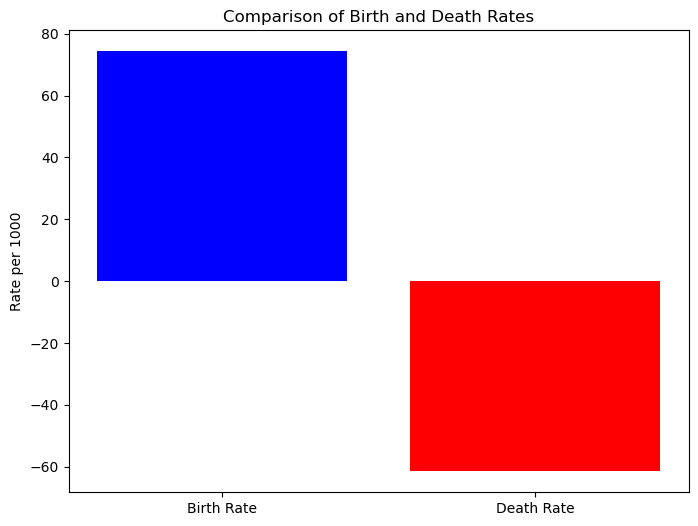

Figure saved as birth_death_rates.png


In [135]:
# calculate birth and death rates
children_aged_zero = df_clean.query('Age == 0').shape[0]
potential_women = df.query('23 <= Age <= 31').shape[0]
birth_rate = children_aged_zero / potential_women
birth_rate_per_1000 = birth_rate * 1000

df_age_band = df_clean.groupby(pd.cut(df_clean['Age'], range(0, 110, 5))).size().reset_index(name='counts')
df_age_band['Deaths'] = df_age_band['counts'].diff()
age_band_width = 5
df_age_band['Death rate per annum'] = df_age_band['Deaths'] / (df_age_band['counts'] * age_band_width)
total_death_rate = df_age_band['Deaths'].sum() / df_clean['Age'].count()

# plot the bar graph
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(['Birth Rate', 'Death Rate'], [birth_rate_per_1000, total_death_rate * 1000], color=['blue', 'red'])
ax.set_ylabel('Rate per 1000')
ax.set_title('Comparison of Birth and Death Rates')
plt.show()

# save the figure
fig.savefig('birth_death_rates.png')

print('Figure saved as birth_death_rates.png')


#### This applies if there are no immigration or emmigration.

## Migration

In [136]:
#Recommended from presentation
df['Relationship to Head of House'].value_counts()

Head                     2991
Son                      1447
Daughter                 1421
Husband                   957
None                      600
Wife                      335
Partner                   265
Lodger                    263
Granddaughter              65
Grandson                   60
Sibling                    36
Cousin                     27
Visitor                    20
Adopted Daughter           18
Adopted Son                17
Neice                      16
Nephew                     13
Step-Son                   13
Step-Daughter              11
Son-in-law                  1
Adopted Granddaughter       1
Name: Relationship to Head of House, dtype: int64

In [137]:
# Create a copy of the original dataframe
df_immigration = df_clean.copy()

# Define a list of values for Lodger and Visitor to be categorized as individuals moving between places
immigration_values = ['Lodger', 'Visitor']

# Create a new column 'Immigration' to categorize individuals as immigrants, emigrants, or non-movers
df_immigration['Immigration'] = df_immigration['Relationship to Head of House'].apply(lambda x: 'Immigrant' if x in immigration_values else ('Emigrant' if x == 'Head' else 'Non-Mover'))

# Calculate immigration and emigration counts based on gender
immigrant_counts = df_immigration[df_immigration['Immigration'] == 'Immigrant']['Gender'].value_counts()
emigrant_counts = df_immigration[df_immigration['Immigration'] == 'Emigrant']['Gender'].value_counts()

# Print the results
print("Immigration counts:\n", immigrant_counts)
print("\nEmigration counts:\n", emigrant_counts)


Immigration counts:
 Male      151
Female    132
Name: Gender, dtype: int64

Emigration counts:
 Female    2117
Male       874
Name: Gender, dtype: int64


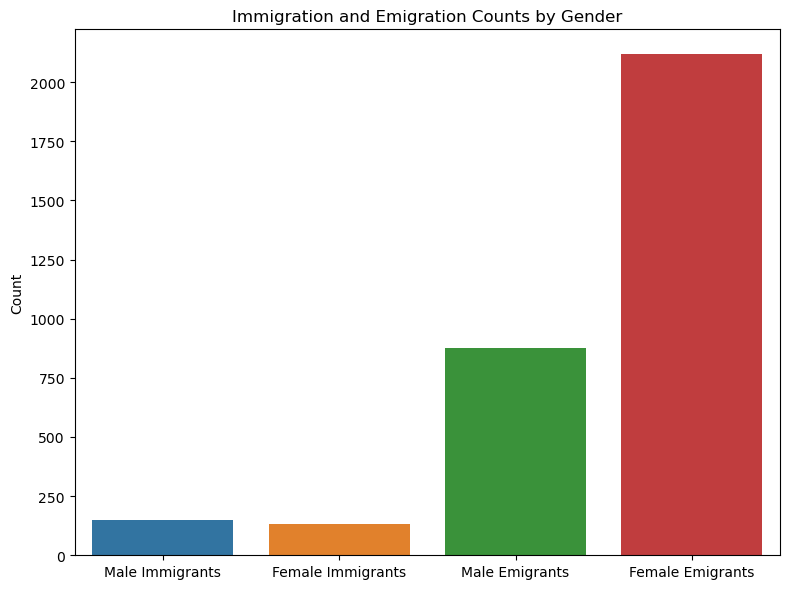

In [138]:
# Create a bar chart showing immigration and emigration counts based on gender
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=['Male Immigrants', 'Female Immigrants', 'Male Emigrants', 'Female Emigrants'], 
            y=[immigrant_counts['Male'], immigrant_counts['Female'], emigrant_counts['Male'], emigrant_counts['Female']],
            ax=ax)
ax.set_title('Immigration and Emigration Counts by Gender')
ax.set_ylabel('Count')
ax.set_xlabel('')
plt.tight_layout()
plt.show()


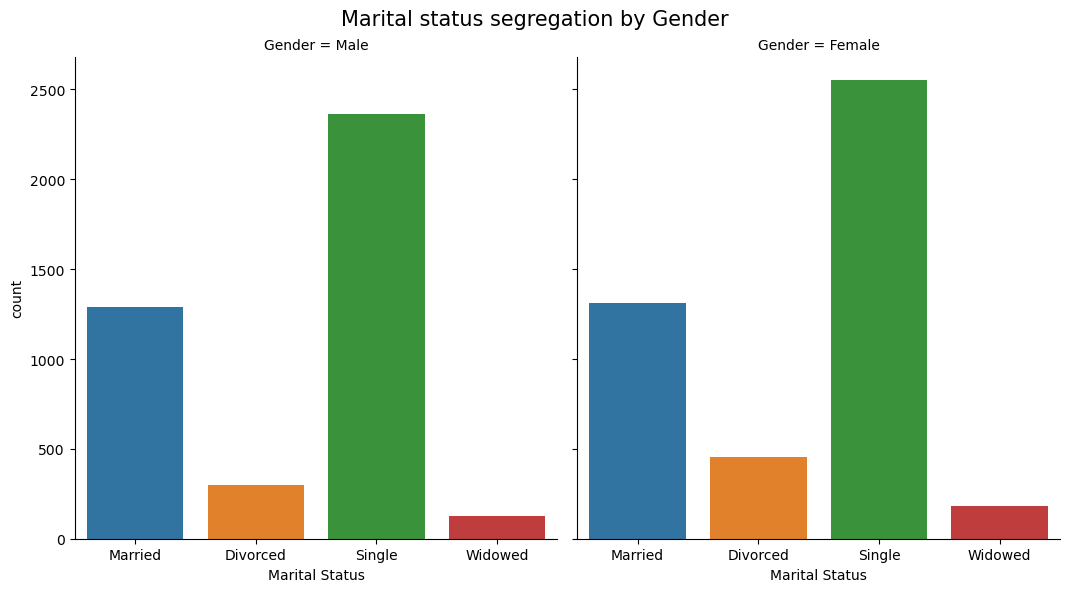

In [143]:
# marital status separated by gender
sns.catplot(data=df_clean, x='Marital Status', col='Gender', kind='count', height=6, aspect=.9)
plt.subplots_adjust(top=0.90)
plt.suptitle('Marital status segregation by Gender\n', fontsize=15)
plt.savefig('marital_status_gender_sep.png')
plt.show()

## References

1. Binning ages: https://datagy.io/pandas-cut-qcut/
2. UK Pension age: https://www.gov.uk/state-pension-age
